In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:

try:
    df=pd.read_csv('insurance.csv')
except Exception as e:
    print('Error : {e}')


In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
fig=px.histogram(
                    df,
                    x='age',
                    marginal='box',
                    nbins=47,
                    title='Distribution of Age'
    )
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig=px.histogram(
                    df,
                    x='bmi',
                    marginal='box',
                    color_discrete_sequence=['red'],
                    title='BMI Distribution'
)
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig=px.histogram(
                    df,
                    x='charges',
                    marginal='box',
                    color='smoker',
                    color_discrete_sequence=['green','grey'],
                    title='Annual Medical Charges'
)
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [14]:
px.histogram(
                df,
                x='smoker',
                color='sex',
                title='Gender based distribution'
)

In [15]:
fig=px.scatter( 
                df,
                x='age',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='Age vs Charges'
)
fig.update_traces(marker_size=5)
fig.show()

In [16]:
fig=px.scatter(
                df,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='BMI and Charges'
)
fig.update_traces(marker_size=5)
fig.show()

In [17]:
fig=px.violin(
                df,
                x='children',
                y='charges',
                title='Children and Charges'
)
fig.show()

In [18]:
df.charges.corr(df.age)

np.float64(0.2990081933306478)

In [19]:
df.charges.corr(df.bmi)

np.float64(0.19834096883362887)

In [20]:
s_values={'yes':1,'no':0}
s_num=df.smoker.map(s_values)
s_num

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [21]:
df.charges.corr(s_num)

np.float64(0.7872514304984778)

In [22]:
non_smoker=df[df['smoker']=='no']


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

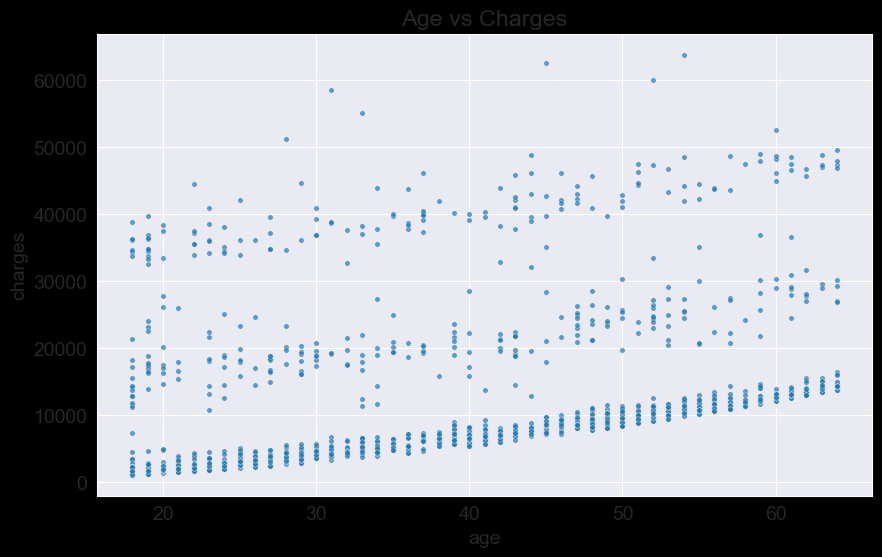

In [23]:
plt.title('Age vs Charges')
sns.scatterplot(
                    df,
                    x='age',
                    y='charges',
                    alpha=0.7,
                    s=15
)

In [24]:
# For Linear Regression we try to fit such a line which is the closest tot all the other points.
#The formula used here is : y=w*x+b (where y is the variable dependent on x , w = weight , and b = bias/intercept)
def estimate_charges(age,w,b):
    return age*w+b

In [25]:
w=50
b=100

In [26]:
estimate_charges(30,w,b)

1600

In [27]:
ages=non_smoker.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [28]:
estimated_charges=estimate_charges(ages,w,b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [29]:
non_smoker.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

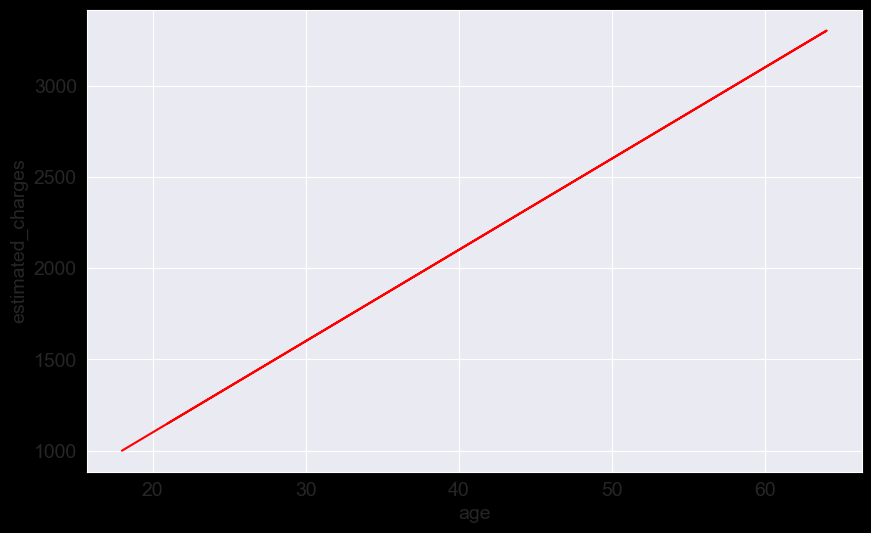

In [30]:
plt.plot(ages,estimated_charges,color='red')
plt.xlabel('age')
plt.ylabel('estimated_charges')
plt.show()

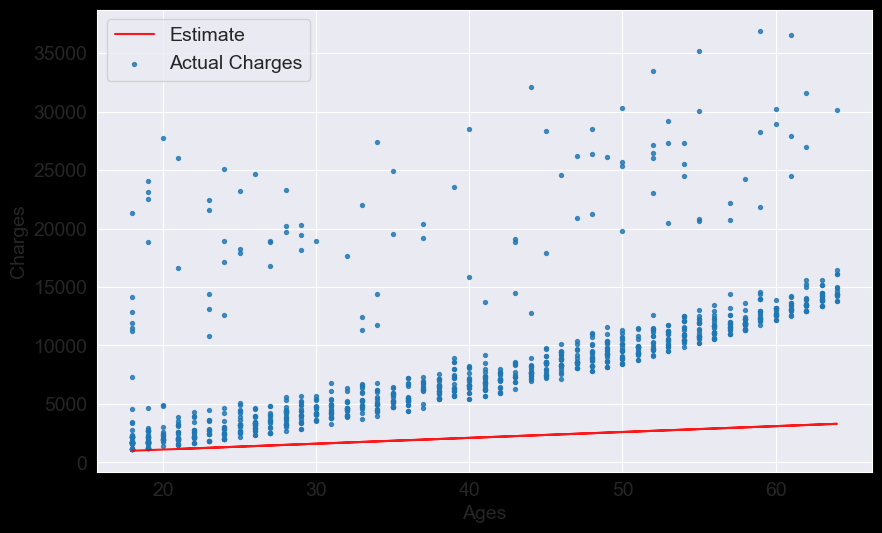

In [31]:
target=non_smoker.charges
plt.plot(ages,estimated_charges,'r',alpha=0.90)
plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel('Ages')
plt.ylabel('Charges')
plt.legend(['Estimate','Actual Charges'])

In [32]:
def try_paramters(w,b):
    ages=non_smoker.age
    estimated_charges=estimate_charges(ages,w,b)
    
    plt.plot(ages,estimated_charges,'r',alpha=0.90)
    plt.scatter(ages,target,s=8,alpha=0.8)
    plt.xlabel('Ages')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual Charges'])

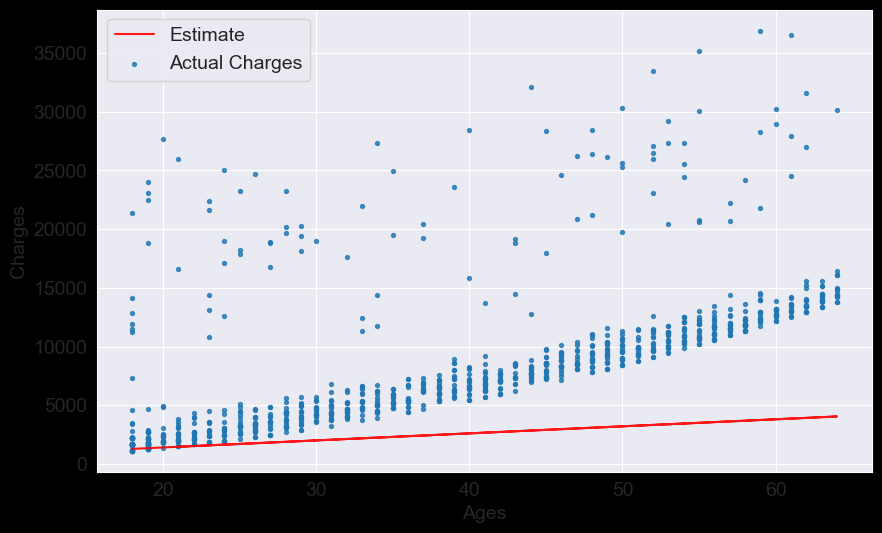

In [33]:
try_paramters(60,200)

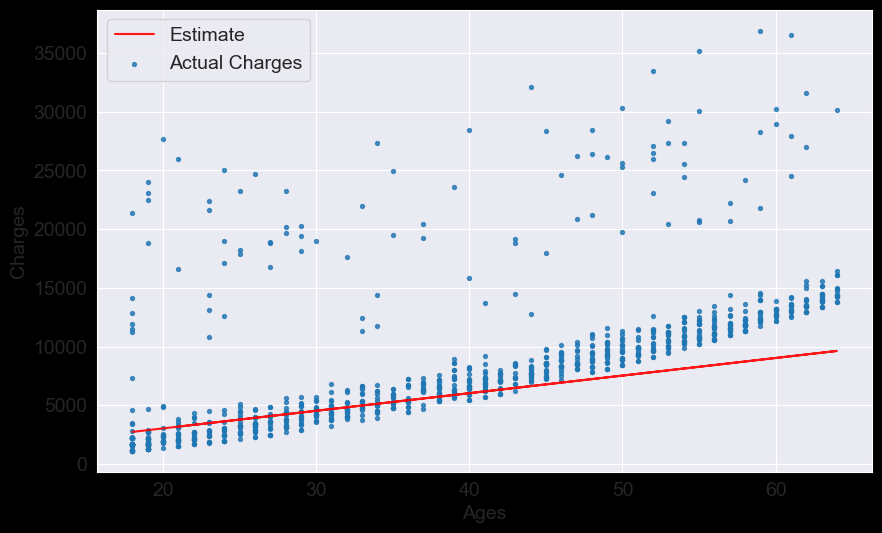

In [34]:
try_paramters(150,25)

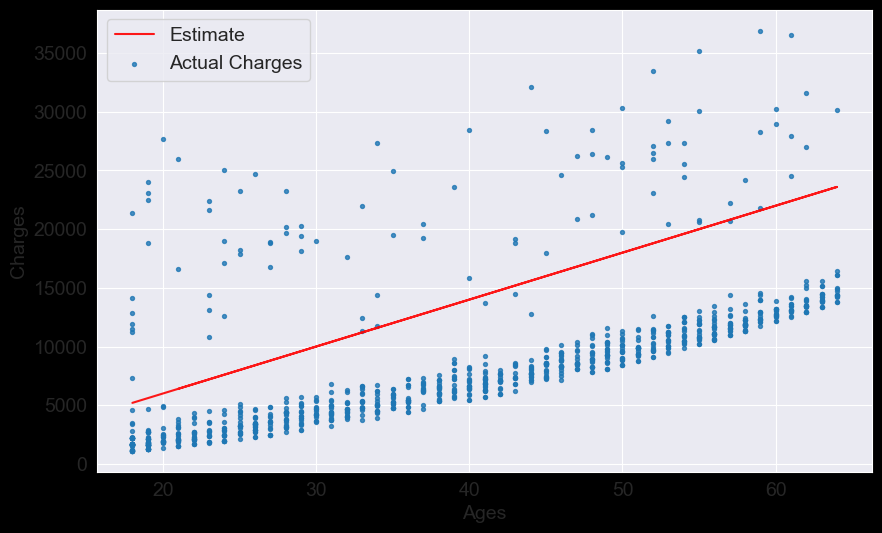

In [35]:
try_paramters(400,-2000)

In [36]:
target=non_smoker.charges
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [37]:
predictions=estimated_charges
predictions 

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [38]:
def rmse(target,predictions):
    return np.sqrt(np.mean(np.square(target-predictions)))

In [39]:
w=50
b=100

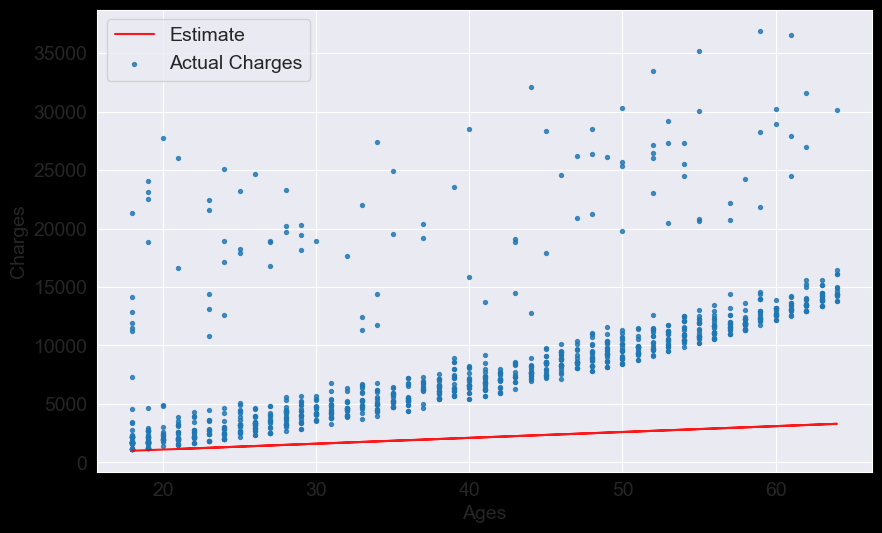

In [40]:
try_paramters(50,100)

In [41]:
target=non_smoker.charges
predicted=estimate_charges(non_smoker.age,w,b)

In [42]:
rmse(target,predicted)
#Each element differs by $8461

np.float64(8461.949562575493)

In [43]:
def try_paramters(w,b):
    ages=non_smoker.age
    target=non_smoker.charges
    estimated_charges=estimate_charges(ages,w,b)
    
    plt.plot(ages,estimated_charges,'r',alpha=0.90)
    plt.scatter(ages,target,s=8,alpha=0.8)
    plt.xlabel('Ages')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual Charges'])
    loss=rmse(target,estimated_charges)
    print(f'THIS IS THE RMSE/LOSS VALUE : {loss}')

THIS IS THE RMSE/LOSS VALUE : 4956.973980899423


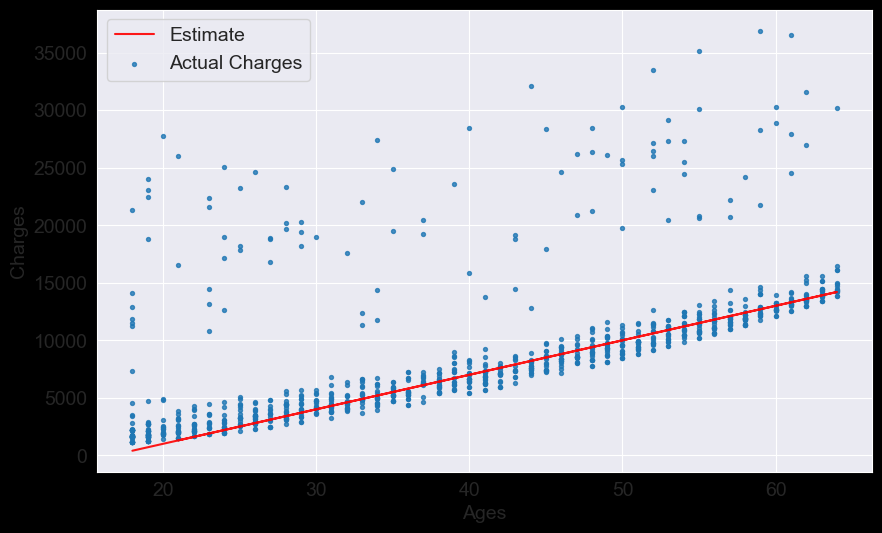

In [44]:
try_paramters(300,-5000)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model=LinearRegression()

In [47]:
input=non_smoker[['age']] # WE USE DOUBLE BRACKETS CAUSE WE CAN FIT MULTIPLE PARAMETERS FOR LINE FITTING
target=non_smoker.charges

In [48]:
model.fit(input,target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
model.predict(np.array([[23],[37],[61]]))

c:\Users\hp\Desktop\prax\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [50]:
predictions=model.predict(input)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [51]:
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [52]:
rmse(target,predictions)

np.float64(4662.505766636395)

In [53]:
model.coef_

array([267.24891283])

In [54]:
model.intercept_

np.float64(-2091.4205565650864)

In [55]:
inputs,target=non_smoker[['age']],non_smoker['charges']

model=LinearRegression()

model.fit(inputs,target)

predictions = model.predict(inputs)

loss=rmse(target,predictions)

print(f'Loss is {loss}')

Loss is 4662.505766636395


In [56]:
#Plane as there are two weights
#Bmi didnt create a major impact

inputs,target=non_smoker[['age','bmi']],non_smoker['charges']

model=LinearRegression()

model.fit(inputs,target)

predictions = model.predict(inputs)

loss=rmse(target,predictions)

print(f'Loss is {loss}')

Loss is 4662.3128354612945


In [57]:
model.coef_

array([266.87657817,   7.07547666])

In [58]:
model.intercept_

np.float64(-2293.6320906488727)

In [59]:
non_smoker.charges.corr(non_smoker['children'])

np.float64(0.13892870453542205)

In [60]:
inputs,target=non_smoker[['age','bmi','children']],non_smoker['charges']

model=LinearRegression()

model.fit(inputs,target)

predictions = model.predict(inputs)

loss=rmse(target,predictions)

print(f'Loss is {loss}')

Loss is 4608.470405038246


In [61]:
inputs,target=df[['age','bmi','children']],df['charges']

model=LinearRegression()

model.fit(inputs,target)

predictions = model.predict(inputs)

loss=rmse(target,predictions)

print(f'Loss is {loss}')

Loss is 11355.317901125973


<Axes: xlabel='smoker', ylabel='charges'>

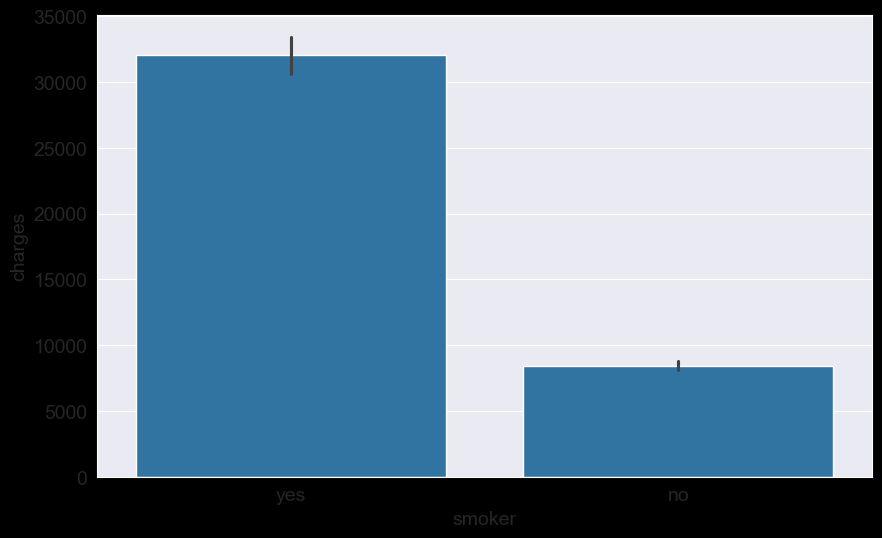

In [62]:
sns.barplot(data=df,x='smoker',y='charges')

In [63]:
smoker_codes={'no':0,'yes':1}
df['smoker_codes']=df.smoker.map(smoker_codes)


In [64]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [65]:
df.charges.corr(df.smoker_codes)

np.float64(0.7872514304984778)

In [66]:
inputs,target=[['age','bmi','children','smoker_codes']],df['charges']

model=LinearRegression().fit(inputs,target)

predictions=model.predict(inputs)

loss=rmse(target,predictions)

loss

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [67]:
#For Doing the same process as done for smoker codes when done for the gender column the correlation is really low and negigible for vast data analysis.

smoker_codes={'female':0,'male':1}
df['sex_codes']=df.sex.map(smoker_codes)

In [ ]:
from sklearn import preprocessing

enc=preprocessing.OneHotEncoder()

enc.fit(df[['region']])
enc.categories_

In [68]:
one_hot=enc.transform(df[['region']]).toarray()
one_hot

NameError: name 'enc' is not defined

In [ ]:
df[['northeast', 'northwest', 'southeast', 'southwest']]=one_hot

df

In [69]:
inputs_cols=['age','bmi','children','smoker_codes','northeast', 'northwest','sex_codes', 'southeast', 'southwest']

inputs,target=df[inputs_cols],df['charges']

model=LinearRegression().fit(inputs,target)

predictions=model.predict(inputs)

loss=rmse(target,predictions)

loss


KeyError: "['northeast', 'northwest', 'southeast', 'southwest'] not in index"

In [ ]:
df[inputs_cols].loc[10]

In [ ]:
model.predict([[28,30,2,1,0,0,1,0,0]])